<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> Sentiment Analysis on mother's Day (NLP) 😁😏😣😌😪😐🥱

</p>
</div>
    

# Purpose of Analysis:
Understanding public opinions on events like mother's day  Can help in strategic Marketing Campaigns , create products tailored to customers specific needs.the purpose of the analysis is to extract key sentiments that can be useful for businesses who wish leverage on human opinion to know the best kind of products and services that could be rendered on occassions such as Mother's day

.

# Primary Objectives:

- process the Data
- Extract sentiments positive negative neutral on mothers day
- Extract strongest Emotions from Comments on mother's day
- visualize relationships between features 
- Build predictive models and pipeline for automation

# About dataset:

- This dataset consists of tweets concerning mother's day



In [213]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
import os
import spacy
from spacy.lang.en.stop_words import STOP_WORDS 
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import LatentDirichletAllocation
import warnings
import os
import re
import string
from tqdm.notebook import tqdm
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud, ImageColorGenerator 
from nltk.corpus import stopwords
import random 
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("opinion of MOthersday_data.csv")
df.head(20)


Unnamed: 0    tweet_id           author  \
0            0  1956967341       xoshayzers   
1            1  1956967666        wannamama   
2            2  1956967696        coolfunky   
3            3  1956967789      czareaquino   
4            4  1956968416        xkilljoyx   
5            5  1956968477    xxxPEACHESxxx   
6            6  1956968487         ShansBee   
7            7  1956968636         mcsleazy   
8            8  1956969035      nic0lepaula   
9            9  1956969172       Ingenue_Em   
10          10  1956969456       feinyheiny   
11          11  1956969531     dudeitsmanda   
12          12  1956970047         Danied32   
13          13  1956970424          Samm_xo   
14          14  1956970860     okiepeanut93   
15          15  1956971077           Sim_34   
16          16  1956971170     poppygallico   
17          17  1956971206  brokenangel1982   
18          18  1956971473            LCJ82   
19          19  1956971586          cleepow   

                                              content  
0   @tiffanylue i know  i was listenin to bad habi...  
1   Layin n bed with a headache  ughhhh...waitin o...  
2                 Funeral ceremony...gloomy friday...  
3                wants to hang out with friends SOON!  
4   @dannycastillo We want to trade with someone w...  
5   Re-pinging @ghostridah14: why didn't you go to...  
6   I should be sleep, but im not! thinking about ...  
7                Hmmm. http://www.djhero.com/ is down  
8             @charviray Charlene my love. I miss you  
9          @kelcouch I'm sorry  at least it's Friday?  
10                                   cant fall asleep  
11                            Choked on her retainers  
12  Ugh! I have to beat this stupid song to get to...  
13  @BrodyJenner if u watch the hills in london u ...  
14                                       Got the news  
15      The storm is here and the electricity is gone  
16                               @annarosekerr agreed  
17  So sleepy again and it's not even that late. I...  
18  @PerezHilton lady gaga tweeted about not being...  
19  How are YOU convinced that I have always wante...

##### TEXT PROCESSING 🔽

In [214]:
# remove whitespaces
df.columns = df.columns.str.strip()
print (df .columns)

Index(['Unnamed: 0', 'tweet_id', 'author', 'content'], dtype='object')


In [215]:
# drop unncessary column
df = df.drop(["Unnamed: 0", "tweet_id"], axis=1)

In [216]:
#show data schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   40000 non-null  object
 1   content  40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [217]:
# sample of data
df.sample()

author                               content
4397  Harmonyivory  Field day is sad. No ribbons for me.

In [218]:
# get unique values
df.nunique()

author     33871
content    39827
dtype: int64

In [219]:
languages = stopwords.fileids()
# Print the number of supported languages
print("Number of supported languages:", len(languages))
# Print the list of supported languages 
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [220]:
from nltk.tokenize import TweetTokenizer

In [221]:
english_stopwords = stopwords.words("english") 
hinglish_stopwords = stopwords.words("hinglish")

In [222]:
df["All_contents"]=df["author"] + df["content"]

In [223]:
def clean_content(contents):
    # Remove URLs, hashtags, mentions, and special characters 
    contents = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", contents) 
    contents = re.sub(r"[^\w\s]", "", contents)
    # Tokenize the tweet0
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True) 
    tokens = tokenizer.tokenize(contents)
    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]
    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens] 
    tokens = [token.lower() for token in tokens]
    
     # Join tokens back into a string 
    cleaned_content = ' '.join(tokens)
    return cleaned_content

In [224]:
# add a seperate column for cleaned data
df["Cleaned_contents"] = df["All_contents"].apply(clean_content)

In [225]:
#data head of cleaned comments
df.head()

author                                            content  \
0   xoshayzers  @tiffanylue i know  i was listenin to bad habi...   
1    wannamama  Layin n bed with a headache  ughhhh...waitin o...   
2    coolfunky                Funeral ceremony...gloomy friday...   
3  czareaquino               wants to hang out with friends SOON!   
4    xkilljoyx  @dannycastillo We want to trade with someone w...   

                                        All_contents  \
0  xoshayzers@tiffanylue i know  i was listenin t...   
1  wannamamaLayin n bed with a headache  ughhhh.....   
2       coolfunkyFuneral ceremony...gloomy friday...   
3    czareaquinowants to hang out with friends SOON!   
4  xkilljoyx@dannycastillo We want to trade with ...   

                                    Cleaned_contents  
0  xoshayzers listenin habit earlier started frea...  
1     wannamamalayin n bed headache ughhhwaitin call  
2             coolfunkyfuneral ceremonygloomy friday  
3                      czareaquinowants hang friends  
4                    xkilljoyx trade houston tickets

In [226]:
# remove Capital letters
def clean_text(text): 
    text = text.lower() 
    return text.strip()

In [227]:
# apply cleaned data
df.Cleaned_contents = df.Cleaned_contents.apply(lambda x: clean_text(x))

In [228]:
# remove all non-alphanumeric characters
def tokenization(text):
    tokens = re.split("W+",text) 
    return tokens

In [229]:
# apply cleaned data
df.Cleaned_contents = df.Cleaned_contents.apply(lambda x: tokenization(x))

In [230]:
# import required libraries for lematizer
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()

In [231]:
# break words to their root meaning
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text]) 
    return lemm_text

In [232]:
#apply lematized data
df.Cleaned_contents = df.Cleaned_contents.apply(lambda x: lemmatizer(x))

In [233]:
# remove unnecessary digits
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text) 
    return(text)

In [234]:
# apply clean data
df.Cleaned_contents= df.Cleaned_contents.apply(lambda x: remove_digits(x))

In [235]:
# remove unnecessary digits for sample text
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) 
    return(clean_text)

In [236]:
import text2emotion as te
def feeling(text):
    all_emo=te.get_emotion(text)
    key_value=max(zip(all_emo.values(),all_emo.keys()))[1]
    return key_value
df["emotions"]=df["Cleaned_contents"].apply(feeling)


In [237]:
#pip install emoji==1.7.0.

In [238]:
#pip install text2emotion

In [239]:
df.head()

author                                            content  \
0   xoshayzers  @tiffanylue i know  i was listenin to bad habi...   
1    wannamama  Layin n bed with a headache  ughhhh...waitin o...   
2    coolfunky                Funeral ceremony...gloomy friday...   
3  czareaquino               wants to hang out with friends SOON!   
4    xkilljoyx  @dannycastillo We want to trade with someone w...   

                                        All_contents  \
0  xoshayzers@tiffanylue i know  i was listenin t...   
1  wannamamaLayin n bed with a headache  ughhhh.....   
2       coolfunkyFuneral ceremony...gloomy friday...   
3    czareaquinowants to hang out with friends SOON!   
4  xkilljoyx@dannycastillo We want to trade with ...   

                                    Cleaned_contents  emotions  
0  xoshayzers listenin habit earlier started frea...  Surprise  
1     wannamamalayin n bed headache ughhhwaitin call      Fear  
2             coolfunkyfuneral ceremonygloomy friday  Surprise  
3                      czareaquinowants hang friends     Happy  
4                    xkilljoyx trade houston tickets  Surprise

In [240]:
# detect languages difference if any
from langdetect import detect
def detect_language(text): 
    try:
        lang = detect(text) 
        return lang
    except:
        return None
df["Language"] = df["Cleaned_contents"].apply(detect_language)

### Emotion EDA 🔽

In [241]:
# emotion counts()
df["emotions"].value_counts()

Surprise    17485
Sad          8966
Happy        7075
Fear         5648
Angry         826
Name: emotions, dtype: int64

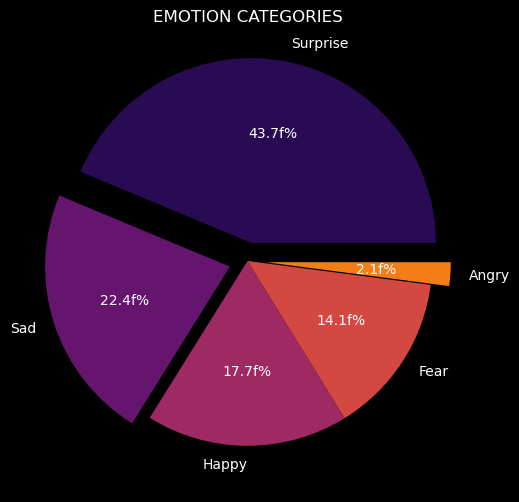

In [242]:
#plot emotion counts
counts = df["emotions"].value_counts()
plt.figure(figsize=(15,6))
plt.pie(counts, labels=counts.index, autopct ="%1.01ff%%", colors = sns.color_palette("inferno"),explode =[0.1,0.1,0,0,0.1 ])
plt.title ("EMOTION CATEGORIES")
plt.show()

In [243]:
# Top 10 active authors
df["author"].value_counts().sort_values(ascending = False)[:10]

MissxMarisa       23
ChineseLearn      22
erkagarcia        19
MiDesfileNegro    19
lost_dog          18
tsarnick          17
KimmiMcfly        15
linnetwoods       15
Quimo             14
twebbstack        14
Name: author, dtype: int64

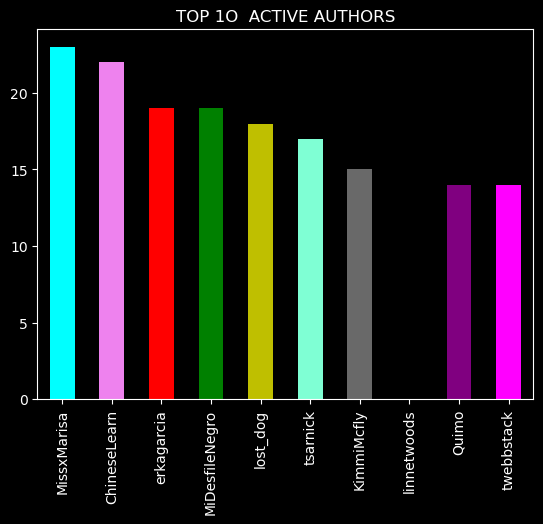

In [244]:
# plot Top 1O  active authors 
df["author"].value_counts()[:10].plot(kind= "bar" , color = ["cyan","violet","r", "g","y","aquamarine","dimgray", "black","purple","magenta" ])
plt.title ("TOP 1O  ACTIVE AUTHORS")
plt.show()

In [246]:
#Top 20 author's emotions 
df.groupby(["emotions"])["author"].value_counts().sort_values(ascending = False)[:10].to_frame()

author
emotions author                 
Sad      lost_dog             18
Happy    ChineseLearn         15
Surprise MissxMarisa          11
         MiDesfileNegro       11
         KimmiMcfly           11
Happy    divxdownloads        10
Surprise tsarnick              9
         jesssicababesss       9
         erkagarcia            9
         cece_newnew           8

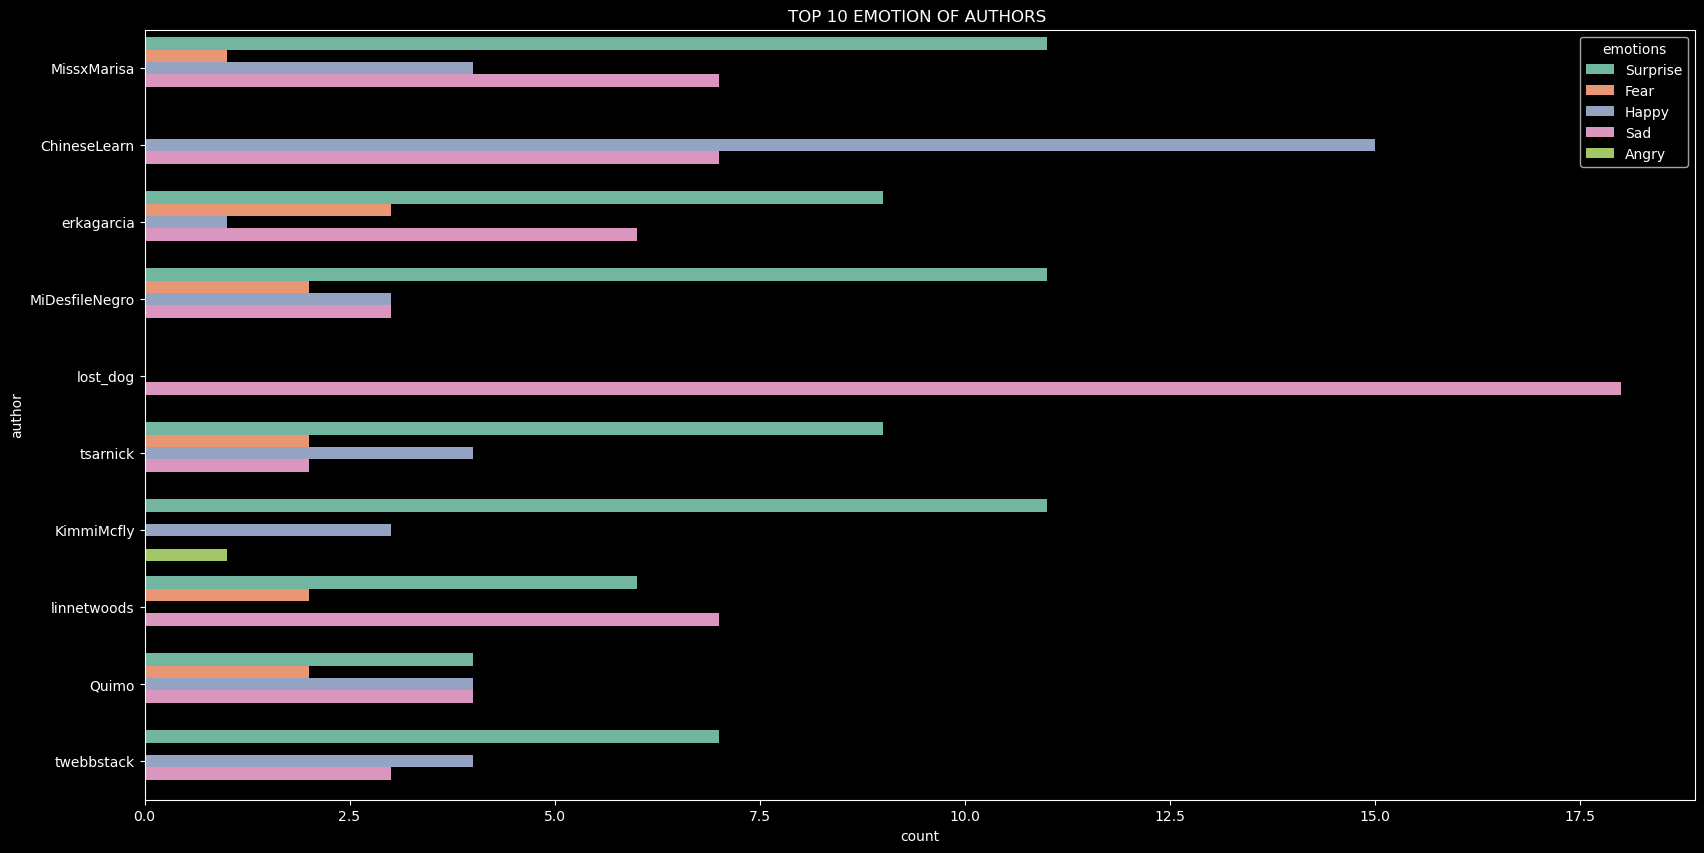

In [247]:
# plot top emotion of active authors
plt.figure(figsize =(20,10))
sns.countplot(y= "author",hue="emotions", data = df,  palette = "Set2" , order = df["author"].value_counts().sort_values(ascending=False).index[:10])
plt.title("TOP 10 EMOTION OF AUTHORS ")
plt.show()

In [248]:
# create copy dataset
df1 = df.copy()

In [249]:
# create new column with containing cleaned content and language
df1["english_contents"] = df[df["Language"] == "en"]["Cleaned_contents"]

In [250]:
# head of new dataframe
df1.head()

author                                            content  \
0   xoshayzers  @tiffanylue i know  i was listenin to bad habi...   
1    wannamama  Layin n bed with a headache  ughhhh...waitin o...   
2    coolfunky                Funeral ceremony...gloomy friday...   
3  czareaquino               wants to hang out with friends SOON!   
4    xkilljoyx  @dannycastillo We want to trade with someone w...   

                                        All_contents  \
0  xoshayzers@tiffanylue i know  i was listenin t...   
1  wannamamaLayin n bed with a headache  ughhhh.....   
2       coolfunkyFuneral ceremony...gloomy friday...   
3    czareaquinowants to hang out with friends SOON!   
4  xkilljoyx@dannycastillo We want to trade with ...   

                                    Cleaned_contents  emotions Language  \
0  xoshayzers listenin habit earlier started frea...  Surprise       en   
1     wannamamalayin n bed headache ughhhwaitin call      Fear       so   
2             coolfunkyfuneral ceremonygloomy friday  Surprise       es   
3                      czareaquinowants hang friends     Happy       en   
4                    xkilljoyx trade houston tickets  Surprise       sv   

                                    english_contents  
0  xoshayzers listenin habit earlier started frea...  
1                                                NaN  
2                                                NaN  
3                      czareaquinowants hang friends  
4                                                NaN

In [251]:
# dropna values
df1 = df1.dropna()

In [252]:
# cleaned dataframe
df1.head()

author                                            content  \
0     xoshayzers  @tiffanylue i know  i was listenin to bad habi...   
3    czareaquino               wants to hang out with friends SOON!   
5  xxxPEACHESxxx  Re-pinging @ghostridah14: why didn't you go to...   
6       ShansBee  I should be sleep, but im not! thinking about ...   
9     Ingenue_Em         @kelcouch I'm sorry  at least it's Friday?   

                                        All_contents  \
0  xoshayzers@tiffanylue i know  i was listenin t...   
3    czareaquinowants to hang out with friends SOON!   
5  xxxPEACHESxxxRe-pinging @ghostridah14: why did...   
6  ShansBeeI should be sleep, but im not! thinkin...   
9  Ingenue_Em@kelcouch I'm sorry  at least it's F...   

                                    Cleaned_contents  emotions Language  \
0  xoshayzers listenin habit earlier started frea...  Surprise       en   
3                      czareaquinowants hang friends     Happy       en   
5             xxxpeachesxxxrepinging prom bf friends     Happy       en   
6  shansbeei sleep im friend hes married damn amp...       Sad       en   
9                          ingenueem im sorry friday       Sad       en   

                                    english_contents  
0  xoshayzers listenin habit earlier started frea...  
3                      czareaquinowants hang friends  
5             xxxpeachesxxxrepinging prom bf friends  
6  shansbeei sleep im friend hes married damn amp...  
9                          ingenueem im sorry friday

In [253]:
#  get length of data
df1["english_content_length"] = df1["english_contents"].str.len()

In [254]:
# check schema of created dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28282 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   author                  28282 non-null  object
 1   content                 28282 non-null  object
 2   All_contents            28282 non-null  object
 3   Cleaned_contents        28282 non-null  object
 4   emotions                28282 non-null  object
 5   Language                28282 non-null  object
 6   english_contents        28282 non-null  object
 7   english_content_length  28282 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


#### visualization 🔽

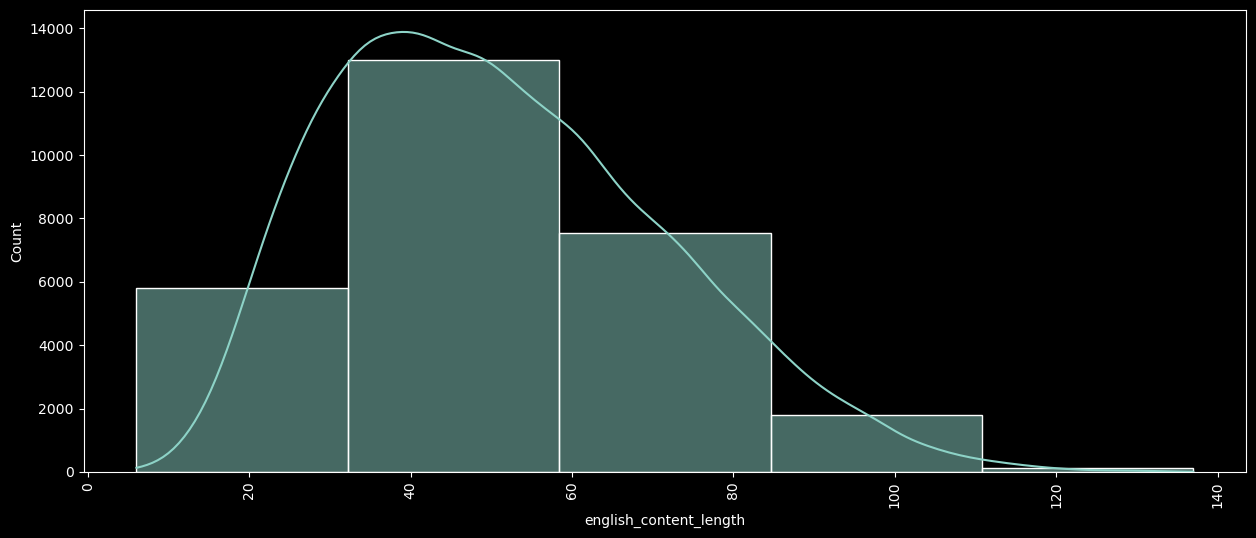

In [255]:
#use dark background
plt.style.use("dark_background")
# visualize length
plt.figure(figsize=(15,6))
sns.histplot(df1["english_content_length"], kde = True, bins = 5, palette = 'hls') 
plt.xticks(rotation = 90)
plt.show()

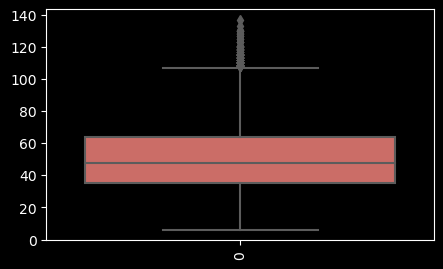

In [256]:
plt.style.use("dark_background")
# visualize length
plt.figure(figsize=(5,3))
sns.boxplot(df1["english_content_length"], palette = "hls") 
plt.xticks(rotation = 90)
plt.show()

In [257]:
# checking for missing values
df1["english_content_length"].isna().sum()

0

##### SENTIMENT POLARITY 🔽

- sentiment polarity Classifies textsinto into positive ,negative and neutral inorder to understand the tone and intent of human opinion

In [258]:
# define spell checkers
spell = SpellChecker()

In [259]:
# define sentiment labels
def label_sentiment(x:float):
    if x < -0.05 : return "negative" 
    if x > 0.35 : return "positive" 
    return "neutral"

In [260]:
# define sentiment intensity
sia = SIA()

In [261]:
# get sentiment scores and overall sentiments
df1["sentiment_scores"] = [sia.polarity_scores(x)["compound"] for x in tqdm(df1["english_contents"])] 
df1["overall_sentiment"] = df1["sentiment_scores"].apply(label_sentiment);

  0%|          | 0/28282 [00:00<?, ?it/s]

In [262]:
# view first roll of dataset
df1.head(1)

author                                            content  \
0  xoshayzers  @tiffanylue i know  i was listenin to bad habi...   

                                        All_contents  \
0  xoshayzers@tiffanylue i know  i was listenin t...   

                                    Cleaned_contents  emotions Language  \
0  xoshayzers listenin habit earlier started frea...  Surprise       en   

                                    english_contents  english_content_length  \
0  xoshayzers listenin habit earlier started frea...                      54   

   sentiment one overall_sentiment  
0            0.0           neutral

In [263]:
# create new data frame for emotion 
df0=df1[["emotions" ,"Cleaned_contents" ,"english_content_length","sentiment one","overall_sentiment"]]

In [264]:
df0

emotions                                   Cleaned_contents  \
0      Surprise  xoshayzers listenin habit earlier started frea...   
3         Happy                      czareaquinowants hang friends   
5         Happy             xxxpeachesxxxrepinging prom bf friends   
6           Sad  shansbeei sleep im friend hes married damn amp...   
9           Sad                          ingenueem im sorry friday   
...         ...                                                ...   
39995  Surprise                                       showmeheaven   
39996     Happy                     drapeauxhappy mothers day love   
39997     Happy  jenniroxhappy mothers day mommies woman man lo...   
39998     Happy  ipdaman 1 wassup beautiful follow peep hit sin...   
39999  Surprise  alpharalpha bullet train tokyo gf visiting jap...   

       english_content_length  sentiment one overall_sentiment  
0                          54         0.0000           neutral  
3                          29         0.4767          positive  
5                          38         0.4767          positive  
6                          59        -0.4404          negative  
9                          25        -0.0772          negative  
...                       ...            ...               ...  
39995                      12         0.0000           neutral  
39996                      30         0.6369          positive  
39997                      64         0.0000           neutral  
39998                      87         0.5994          positive  
39999                      93         0.0000           neutral  

[28282 rows x 5 columns]

In [265]:
# data frame Schema
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28282 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   emotions                28282 non-null  object 
 1   Cleaned_contents        28282 non-null  object 
 2   english_content_length  28282 non-null  int64  
 3   sentiment one           28282 non-null  float64
 4   overall_sentiment       28282 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


##### STATISTICAL COUNTS 🔽

In [266]:
# Sentiment Analysis Metrics
overall_sentiment_counts = df0["overall_sentiment"].value_counts() 
average_sentiment_score = df0["sentiment one"].mean() 
avg_english_content_length = df0["english_content_length"].mean()
# Categorical Metrics
emotion_categories = df["emotions"].value_counts()
sentiment_distribution_1 = df0.groupby("sentiment one")["overall_sentiment"].value_counts(normalize=True)


# Print the calculated metrics
print("Sentiment Analysis Metrics:",overall_sentiment_counts )
print("Average Sentiment Score:", average_sentiment_score) 
print("avg_english_content_length:", avg_english_content_length) 

print("\nCategorical Metrics -emotion_categories :")
print(emotion_categories)
print("\nCategorical Metrics by overall_sentiment")
print(sentiment_distribution_1)


Sentiment Analysis Metrics: neutral     12199
positive     8817
negative     7266
Name: overall_sentiment, dtype: int64
Average Sentiment Score: 0.09399309101195107
avg_english_content_length: 50.80125167951347

Categorical Metrics -emotion_categories :
Surprise    17485
Sad          8966
Happy        7075
Fear         5648
Angry         826
Name: emotions, dtype: int64

Categorical Metrics by overall_sentiment
sentiment one  overall_sentiment
-0.9726        negative             1.0
-0.9648        negative             1.0
-0.9590        negative             1.0
-0.9559        negative             1.0
-0.9493        negative             1.0
                                   ... 
 0.9648        positive             1.0
 0.9661        positive             1.0
 0.9674        positive             1.0
 0.9698        positive             1.0
 0.9781        positive             1.0
Name: overall_sentiment, Length: 520, dtype: float64


In [267]:
# getting counts
df0["Word_Count"] = df0["Cleaned_contents"].apply(lambda x: len(x.split())) 
df0["Char_Count"] = df0["Cleaned_contents"].apply(len)

In [268]:
#pip upgrade scikit-learn

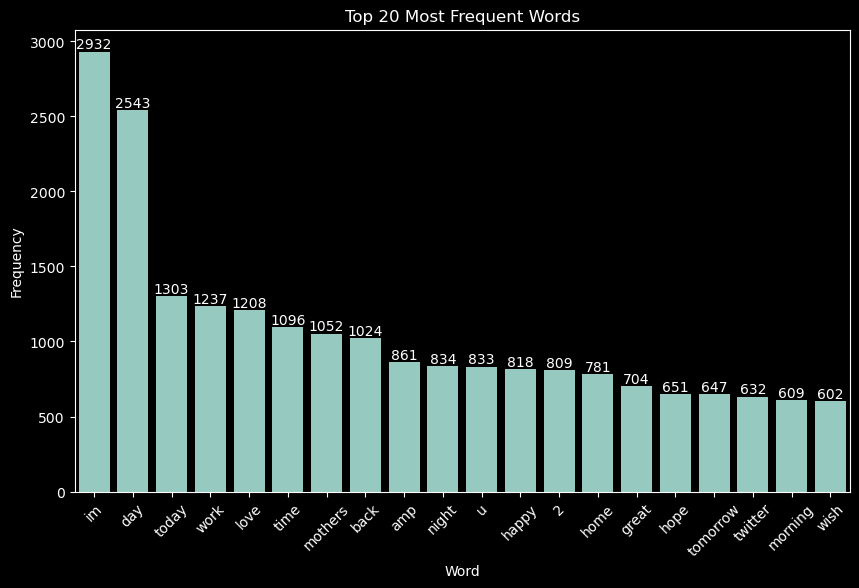

In [269]:
plt.style.use("dark_background")
# Word Frequency Analysis
from collections import Counter
word_frequency = Counter(" ".join(df0["Cleaned_contents"]).split()).most_common(20)
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0]
ax = sns.barplot(x=[word[0] for word in word_frequency], y=[word[1] for word in word_frequency], color=color)
ax.bar_label(ax.containers[0], fmt="%.0f", label_type="edge")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()

 # Emotion polarity 🔽
- Emotion polarity helps in understanding underlyng emotions and attitudes conveyed in text it checks whether the emotion sentiment is positive ,negative or neutral

In [270]:
from textblob import TextBlob

In [271]:
def calculate_emotions(text):
    blob = TextBlob(text)
    emotion_scores = blob.sentiment.polarity, blob.sentiment.subjectivity 
    return emotion_scores
# Apply emotion analysis to the feedback text
df0["Emotion_Sentiments"] = df0["emotions"].apply(calculate_emotions)
# Extract emotion scores for each emotion category
df0["Emotion_Polarity"] = df0["Emotion_Sentiments"].apply(lambda x: x[0])
df0["Emotion_Subjectivity"] = df0["Emotion_Sentiments"].apply(lambda x: x[1])
# assign emotion labels based on polarity values
df0["Emotion_Label"] = df0["Emotion_Polarity"].apply(lambda x: "Positive" if x >0 else "Negative" if x < 0 else "Neutral")
# the resulting dataframe with emotion scores and labels
df0[["emotions", "Emotion_Polarity", "Emotion_Subjectivity","Emotion_Label"]].head()

emotions  Emotion_Polarity  Emotion_Subjectivity Emotion_Label
0  Surprise               0.0                   0.0       Neutral
3     Happy               0.8                   1.0      Positive
5     Happy               0.8                   1.0      Positive
6       Sad              -0.5                   1.0      Negative
9       Sad              -0.5                   1.0      Negative

In [272]:
# get emotion_sentiment
df0.rename(columns={df0.columns[0] : "Emotion_sentiments"} ,inplace = True)
df0.head()

Emotion_sentiments                                   Cleaned_contents  \
0           Surprise  xoshayzers listenin habit earlier started frea...   
3              Happy                      czareaquinowants hang friends   
5              Happy             xxxpeachesxxxrepinging prom bf friends   
6                Sad  shansbeei sleep im friend hes married damn amp...   
9                Sad                          ingenueem im sorry friday   

   english_content_length  sentiment one overall_sentiment  Word_Count  \
0                      54         0.0000           neutral           7   
3                      29         0.4767          positive           3   
5                      38         0.4767          positive           4   
6                      59        -0.4404          negative          10   
9                      25        -0.0772          negative           4   

   Char_Count Emotion_Sentiments  Emotion_Polarity  Emotion_Subjectivity  \
0          54         (0.0, 0.0)               0.0                   0.0   
3          29         (0.8, 1.0)               0.8                   1.0   
5          38         (0.8, 1.0)               0.8                   1.0   
6          59        (-0.5, 1.0)              -0.5                   1.0   
9          25        (-0.5, 1.0)              -0.5                   1.0   

  Emotion_Label  
0       Neutral  
3      Positive  
5      Positive  
6      Negative  
9      Negative

### Emotion Polarity ANALYSIS EDA🔽

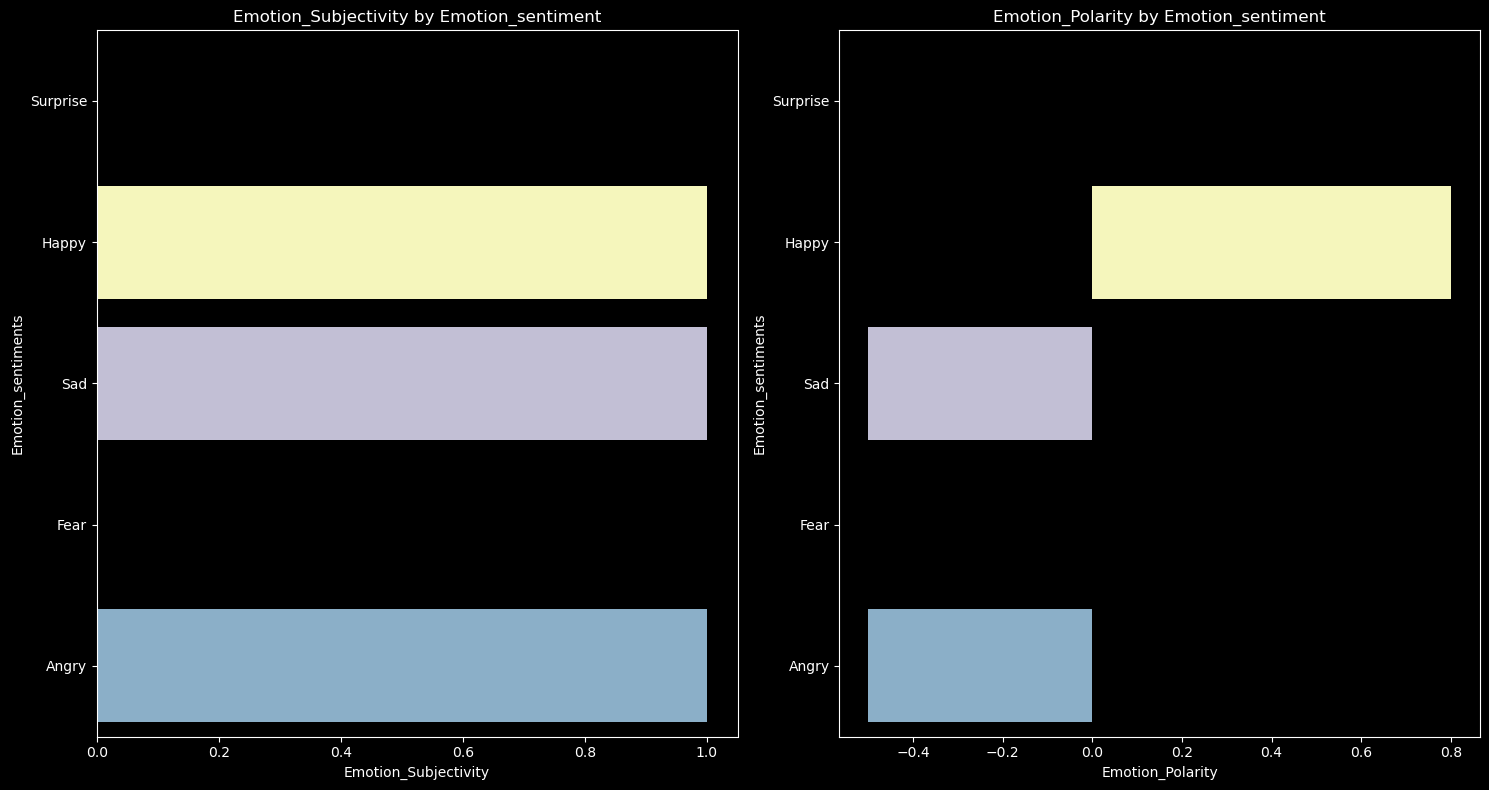

In [273]:
# plot style
plt.style.use("dark_background")
fig, axes = plt.subplots(1, 2,figsize= (15,8))

#create plot in each subplot
sns.barplot(df0, x="Emotion_Subjectivity", y="Emotion_sentiments", ax=axes[0])
sns.barplot(df0, x="Emotion_Polarity", y="Emotion_sentiments", ax=axes[1])
ax=axes[0].set_title("Emotion_Subjectivity by Emotion_sentiment")
ax= axes[1].set_title("Emotion_Polarity by Emotion_sentiment")
fig.tight_layout()
plt.show()

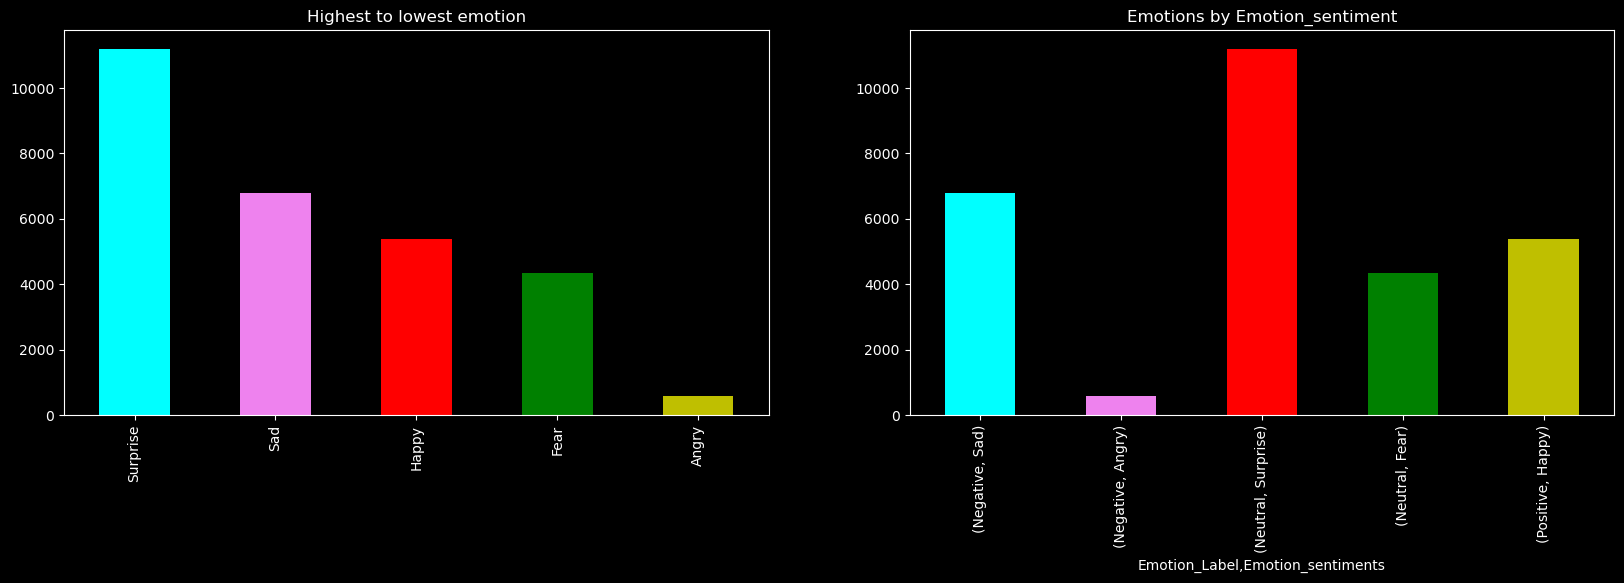

In [274]:
# plot style
plt.style.use("dark_background")
f,ax = plt.subplots (1,2, figsize = (20 ,5))


df0["Emotion_sentiments"].value_counts().plot(ax = ax [0], kind= "bar" , color = ["cyan","violet","r", "g","y","aquamarine","dimgray", "black","purple","magenta" ])
ax[0].set_title("Highest to lowest emotion")
df0.groupby(["Emotion_Label"])["Emotion_sentiments"].value_counts().plot(ax = ax [1], kind= "bar",color = ["cyan","violet","r", "g","y","aquamarine","dimgray","black","purple","magenta"])
ax[1].set_title("Emotions by Emotion_sentiment")
plt.show ()

In [275]:

df0.head(1)

Emotion_sentiments                                   Cleaned_contents  \
0           Surprise  xoshayzers listenin habit earlier started frea...   

   english_content_length  sentiment one overall_sentiment  Word_Count  \
0                      54            0.0           neutral           7   

   Char_Count Emotion_Sentiments  Emotion_Polarity  Emotion_Subjectivity  \
0          54         (0.0, 0.0)               0.0                   0.0   

  Emotion_Label  
0       Neutral

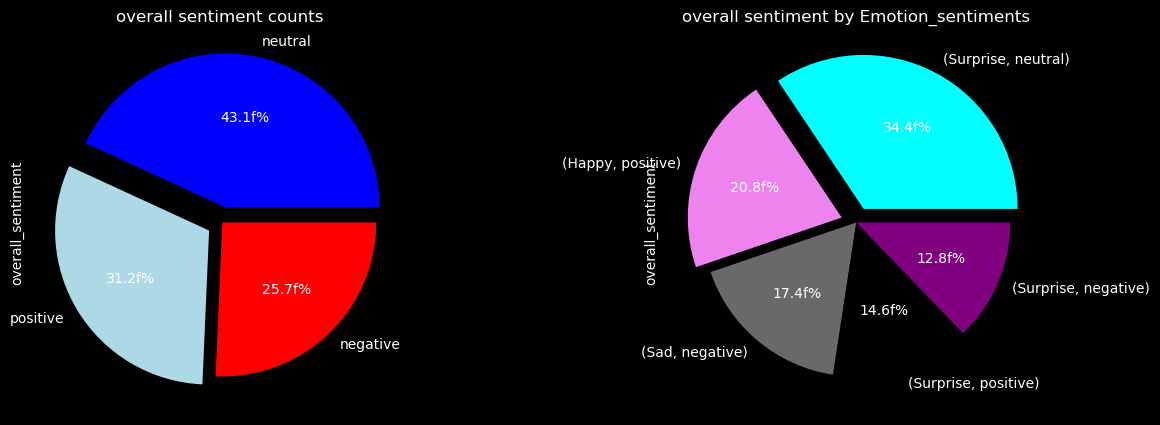

In [276]:
# plot style
plt.style.use("dark_background")

f,ax = plt.subplots (1,2,figsize = (15 ,5))
df0["overall_sentiment"].value_counts().plot.pie(ax = ax [0], autopct ="%1.1ff%%" ,colors = ["b","lightblue","r" ,"g" ,"y"],explode =[0.1,0.1,0] )
df0.groupby(["Emotion_sentiments"])["overall_sentiment"].value_counts().sort_values(ascending= False)[:5].plot.pie(ax = ax [1], autopct ="%1.1ff%%" ,colors = ["cyan","violet","dimgray" ,"black" ,"purple"],explode =[0.1,0.1,0,0,0])
ax[0].set_title("overall sentiment counts ")
ax[1].set_title("overall sentiment by Emotion_sentiments")
plt.show ()

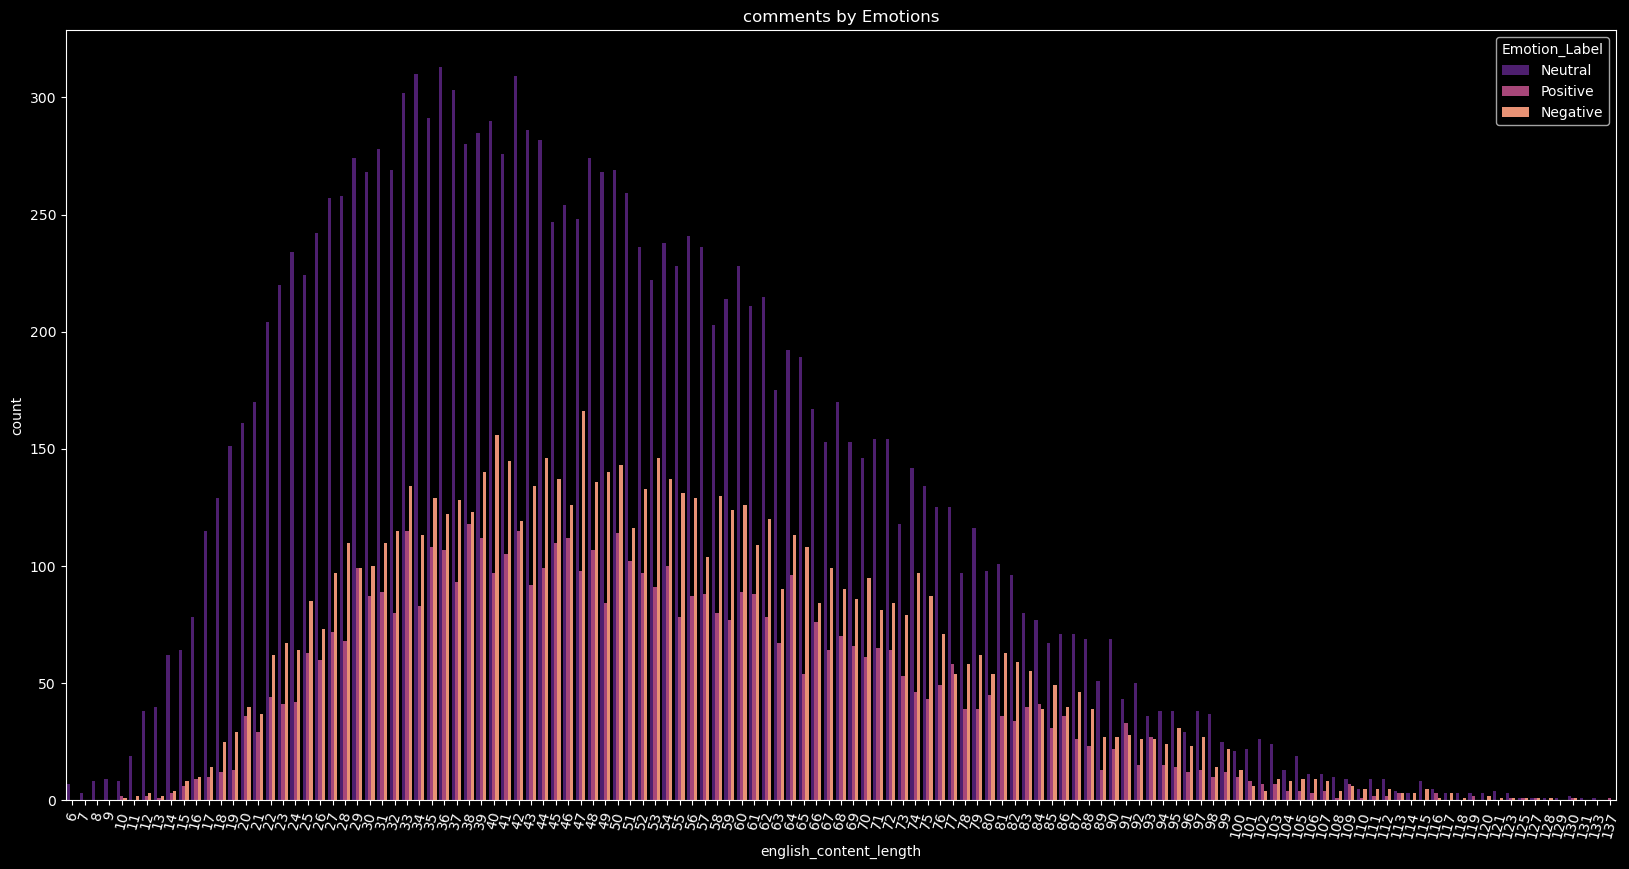

In [333]:

#required plot size
plt.figure(figsize=(20,10))
# plot visualization
ax= sns.countplot(x="english_content_length",hue="Emotion_Label",data = df0 ,palette="magma")
#set a title
ax.set_title("comments by Emotions")
# create a rotation pattern
plt.xticks(rotation=75)
# show plot
plt.show()

In [277]:
df0.head(1)

Emotion_sentiments                                   Cleaned_contents  \
0           Surprise  xoshayzers listenin habit earlier started frea...   

   english_content_length  sentiment one overall_sentiment  Word_Count  \
0                      54            0.0           neutral           7   

   Char_Count Emotion_Sentiments  Emotion_Polarity  Emotion_Subjectivity  \
0          54         (0.0, 0.0)               0.0                   0.0   

  Emotion_Label  
0       Neutral

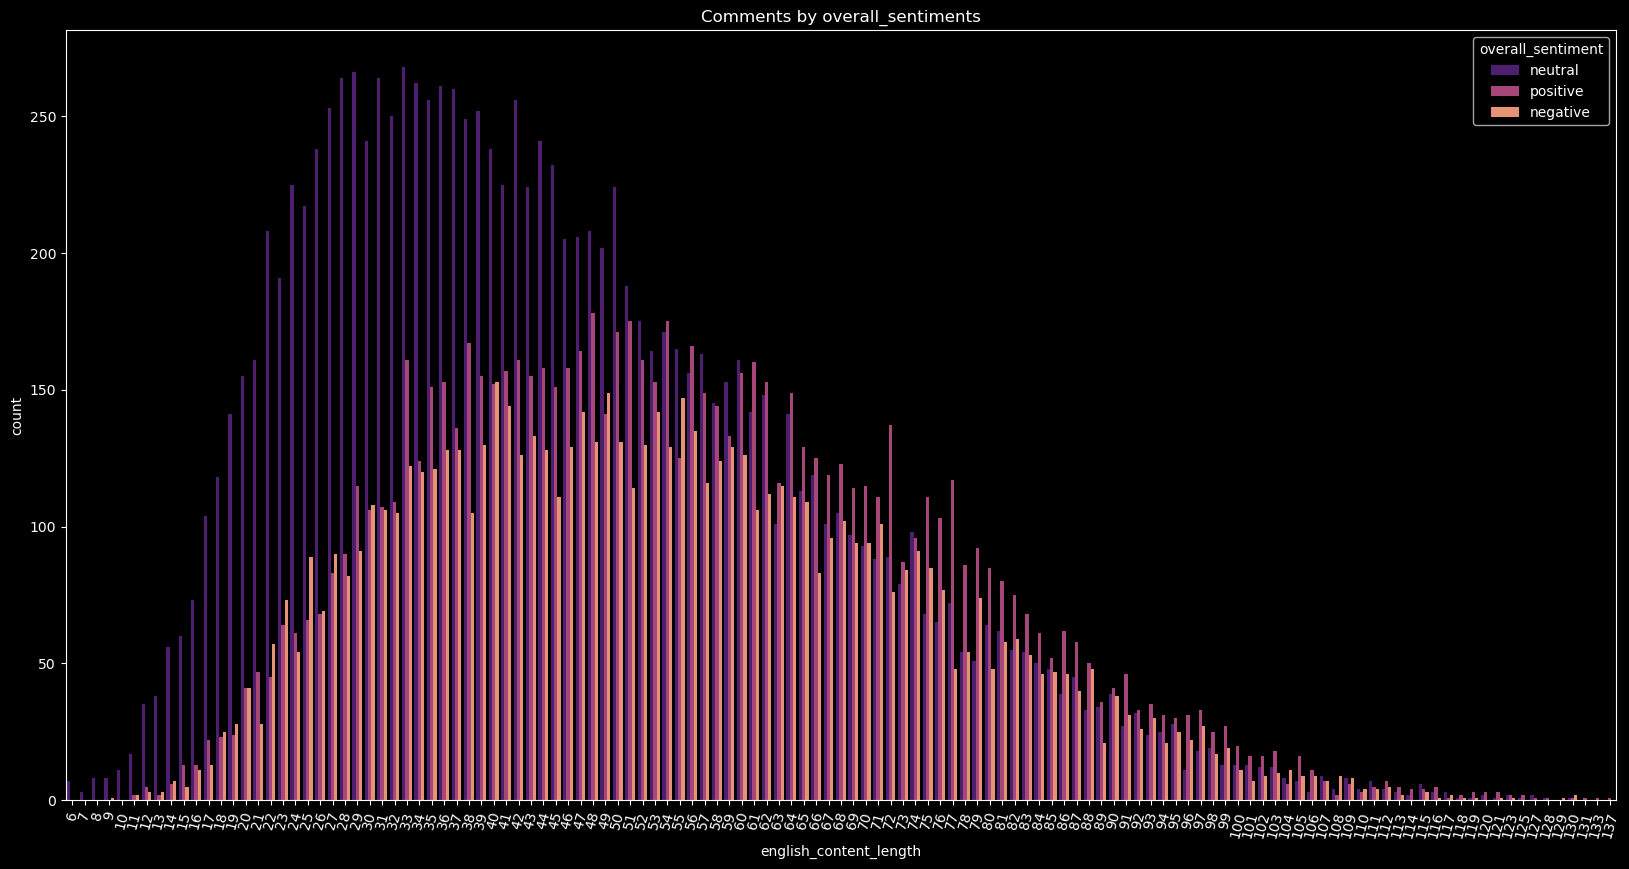

In [334]:
plt.style.use("dark_background")
#required plot size
plt.figure(figsize=(20,10))
# plot visualization
ax= sns.countplot(x="english_content_length",hue="overall_sentiment",data = df0 ,palette="magma")
#set a title
ax.set_title("Comments by overall_sentiments")
# create a rotation pattern
plt.xticks(rotation=75)
#ax.bar_label(ax.containers[0],fmt="%.0f",label_type="edge")
#ax.bar_label(ax.containers[1],fmt="%.0f",label_type="edge")
# show plot
plt.show()

In [280]:
# show data schema
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28282 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emotion_sentiments      28282 non-null  object 
 1   Cleaned_contents        28282 non-null  object 
 2   english_content_length  28282 non-null  int64  
 3   sentiment one           28282 non-null  float64
 4   overall_sentiment       28282 non-null  object 
 5   Word_Count              28282 non-null  int64  
 6   Char_Count              28282 non-null  int64  
 7   Emotion_Sentiments      28282 non-null  object 
 8   Emotion_Polarity        28282 non-null  float64
 9   Emotion_Subjectivity    28282 non-null  float64
 10  Emotion_Label           28282 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [281]:
#pip install -U scikit-learn

In [282]:
#pip show scikit-learn 

In [283]:
df1["overall_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [284]:
# get new datafram
df2 = df1[["english_contents", "overall_sentiment"]]

In [285]:
df2

english_contents overall_sentiment
0      xoshayzers listenin habit earlier started frea...           neutral
3                          czareaquinowants hang friends          positive
5                 xxxpeachesxxxrepinging prom bf friends          positive
6      shansbeei sleep im friend hes married damn amp...          negative
9                              ingenueem im sorry friday          negative
...                                                  ...               ...
39995                                       showmeheaven           neutral
39996                     drapeauxhappy mothers day love          positive
39997  jenniroxhappy mothers day mommies woman man lo...           neutral
39998  ipdaman 1 wassup beautiful follow peep hit sin...          positive
39999  alpharalpha bullet train tokyo gf visiting jap...           neutral

[28282 rows x 2 columns]

In [286]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase 
    cleaned_text = re.sub("[^a-zA-Z]", " ", text).lower()
    # Remove extra white spaces
    cleaned_text = re.sub("\s+", " ", cleaned_text).strip() 
    # Split the text into words
    words = cleaned_text.split()
    # Join the words back into a string
    cleaned_text = " ".join(words)
    return cleaned_text
# Apply the clean_text function to the 'english_tweets' column
df2["Cleaned_English_contents"] = df2["english_contents"].apply(clean_text)

In [287]:
df2

english_contents overall_sentiment  \
0      xoshayzers listenin habit earlier started frea...           neutral   
3                          czareaquinowants hang friends          positive   
5                 xxxpeachesxxxrepinging prom bf friends          positive   
6      shansbeei sleep im friend hes married damn amp...          negative   
9                              ingenueem im sorry friday          negative   
...                                                  ...               ...   
39995                                       showmeheaven           neutral   
39996                     drapeauxhappy mothers day love          positive   
39997  jenniroxhappy mothers day mommies woman man lo...           neutral   
39998  ipdaman 1 wassup beautiful follow peep hit sin...          positive   
39999  alpharalpha bullet train tokyo gf visiting jap...           neutral   

                                Cleaned_English_contents  
0      xoshayzers listenin habit earlier started frea...  
3                          czareaquinowants hang friends  
5                 xxxpeachesxxxrepinging prom bf friends  
6      shansbeei sleep im friend hes married damn amp...  
9                              ingenueem im sorry friday  
...                                                  ...  
39995                                       showmeheaven  
39996                     drapeauxhappy mothers day love  
39997  jenniroxhappy mothers day mommies woman man lo...  
39998  ipdaman wassup beautiful follow peep hit singl...  
39999  alpharalpha bullet train tokyo gf visiting jap...  

[28282 rows x 3 columns]

In [288]:
# getting necessary column into new data frame
df3 = df2[["Cleaned_English_contents", "overall_sentiment"]]

In [289]:
df3

Cleaned_English_contents overall_sentiment
0      xoshayzers listenin habit earlier started frea...           neutral
3                          czareaquinowants hang friends          positive
5                 xxxpeachesxxxrepinging prom bf friends          positive
6      shansbeei sleep im friend hes married damn amp...          negative
9                              ingenueem im sorry friday          negative
...                                                  ...               ...
39995                                       showmeheaven           neutral
39996                     drapeauxhappy mothers day love          positive
39997  jenniroxhappy mothers day mommies woman man lo...           neutral
39998  ipdaman wassup beautiful follow peep hit singl...          positive
39999  alpharalpha bullet train tokyo gf visiting jap...           neutral

[28282 rows x 2 columns]

In [290]:
# more cleaning practices to make sure our data is ready
non_meaningful_words = ["cr", "amp", "rs", "u", "l"]
def remove_non_meaningful_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in non_meaningful_words] 
    filtered_text = " ".join(filtered_tokens)
    return filtered_text
df3["Cleaned_English_contents"] = df3["Cleaned_English_contents"].apply(remove_non_meaningful_words)

#### OVERALL SENTIMENT CLUSTERS 🔽

In [291]:
# import word to  view topmost occuring words
import wordcloud

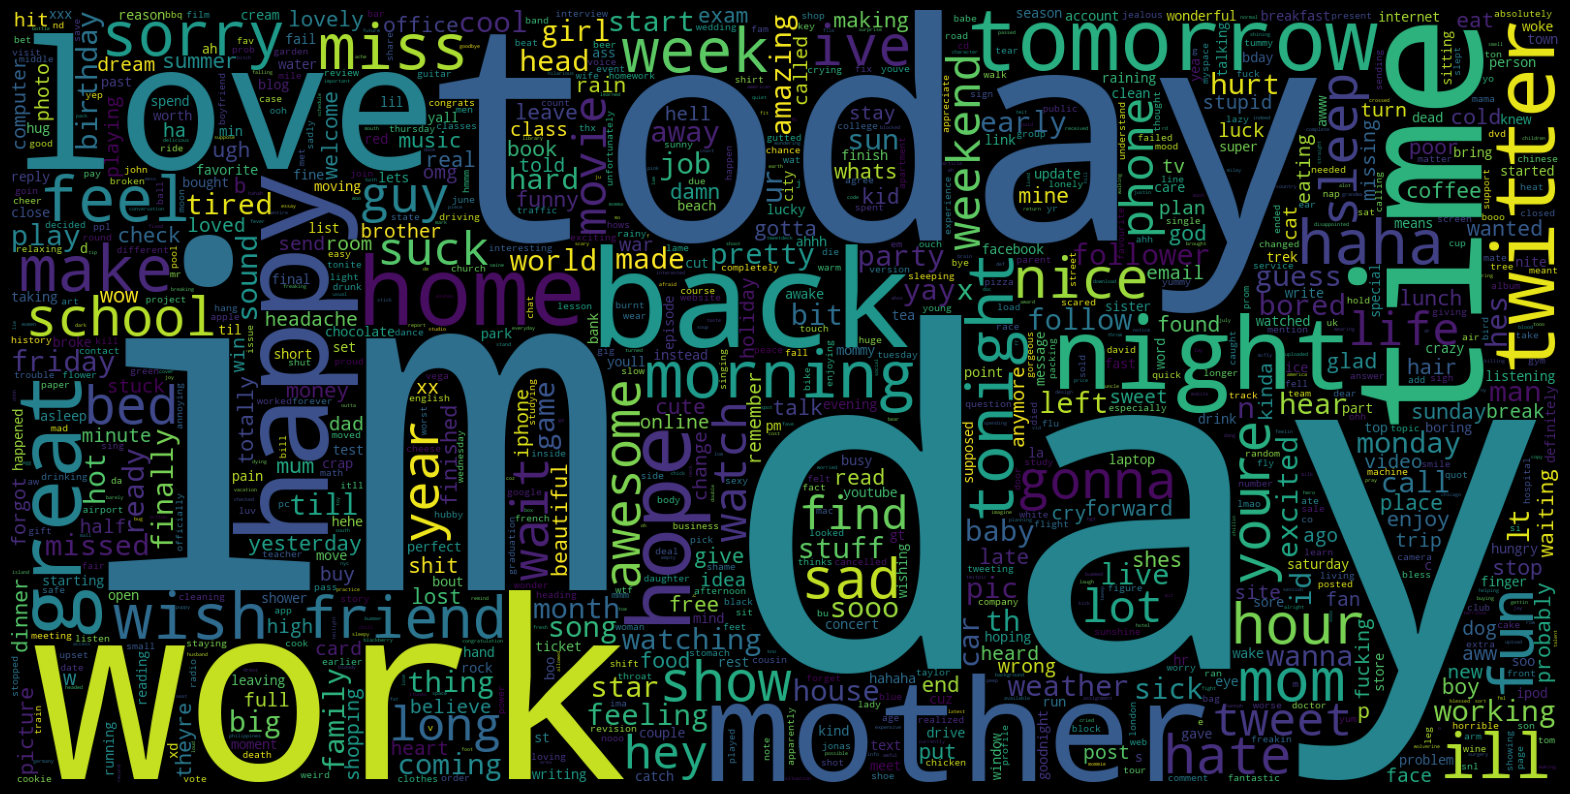

In [292]:

from wordcloud import WordCloud
data = df3["Cleaned_English_contents"]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, 
               collocations=False).generate(" ".join(data)) 
plt.imshow(wc)
plt.axis("off")
plt.show()

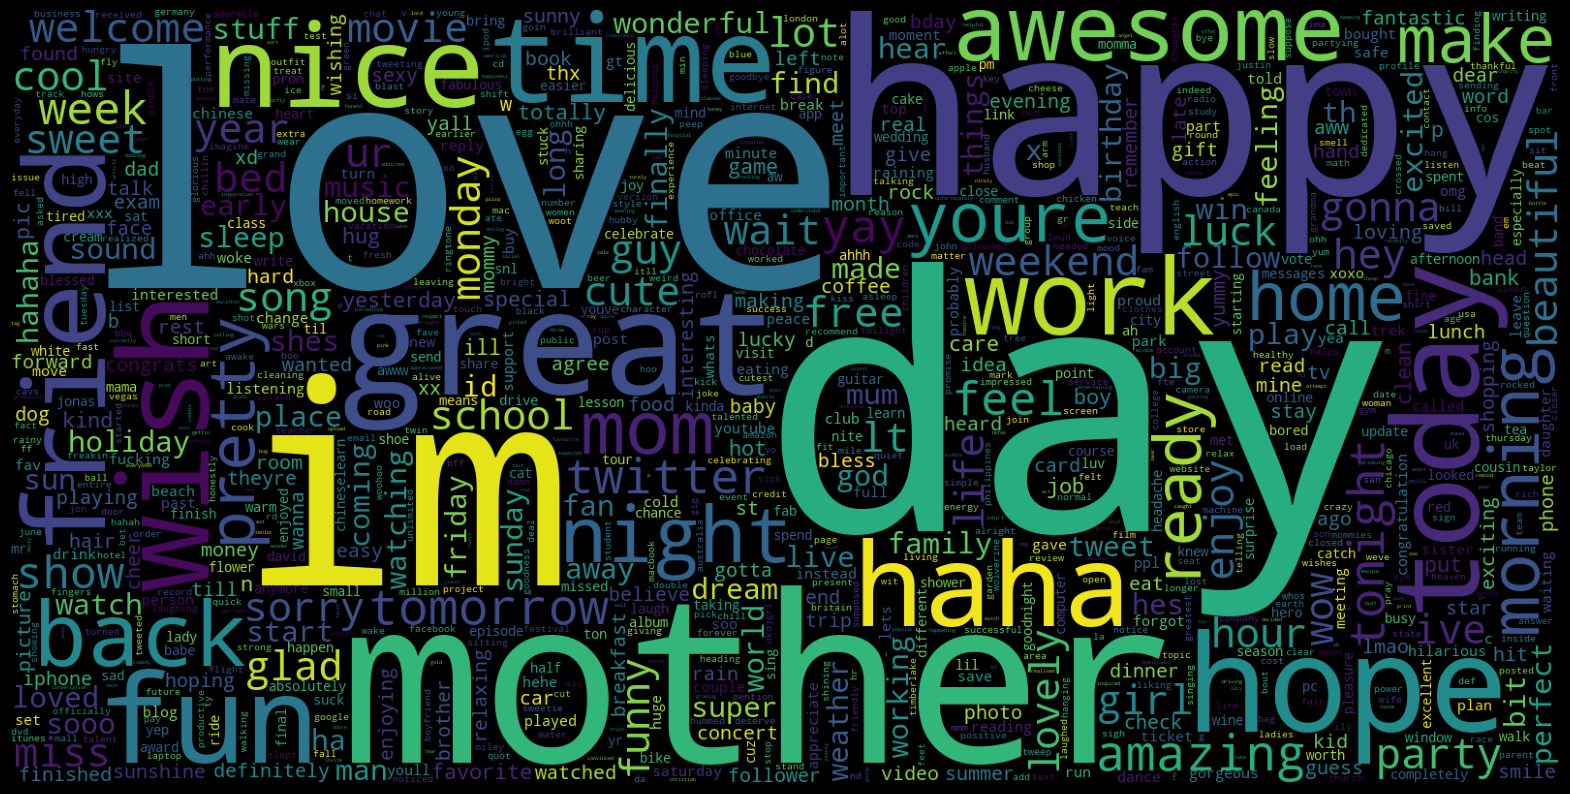

In [293]:
# import word to  view topmost occuring POSITIVE words
data = df3[df3["overall_sentiment"]=="positive"]["Cleaned_English_contents"] 
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis("off")
plt.show()

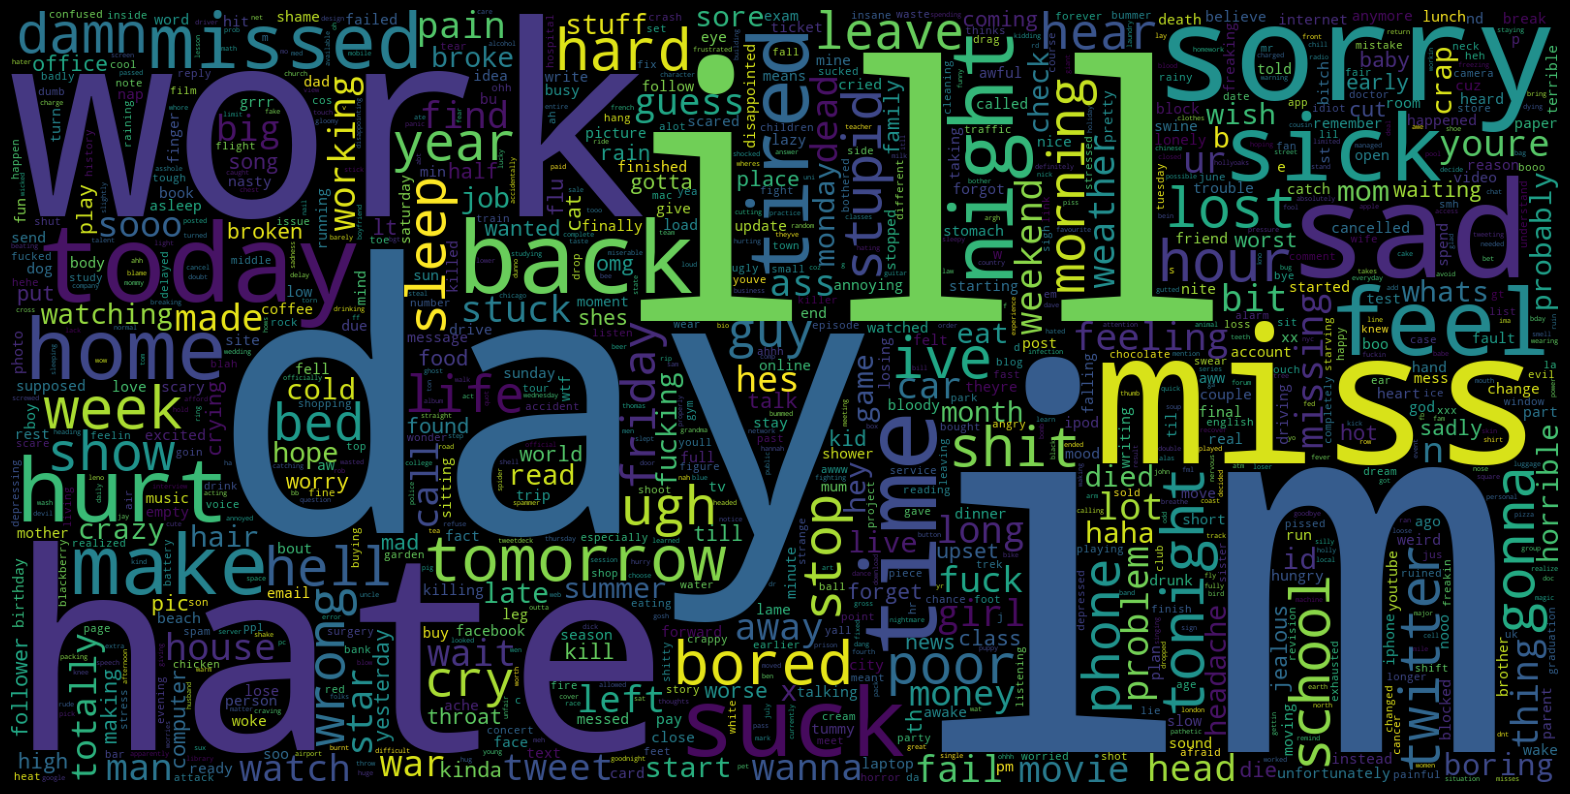

In [294]:
# view topmost occuring negative words
data = df3[df3["overall_sentiment"]=="negative"]["Cleaned_English_contents"] 
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis("off")
plt.show()

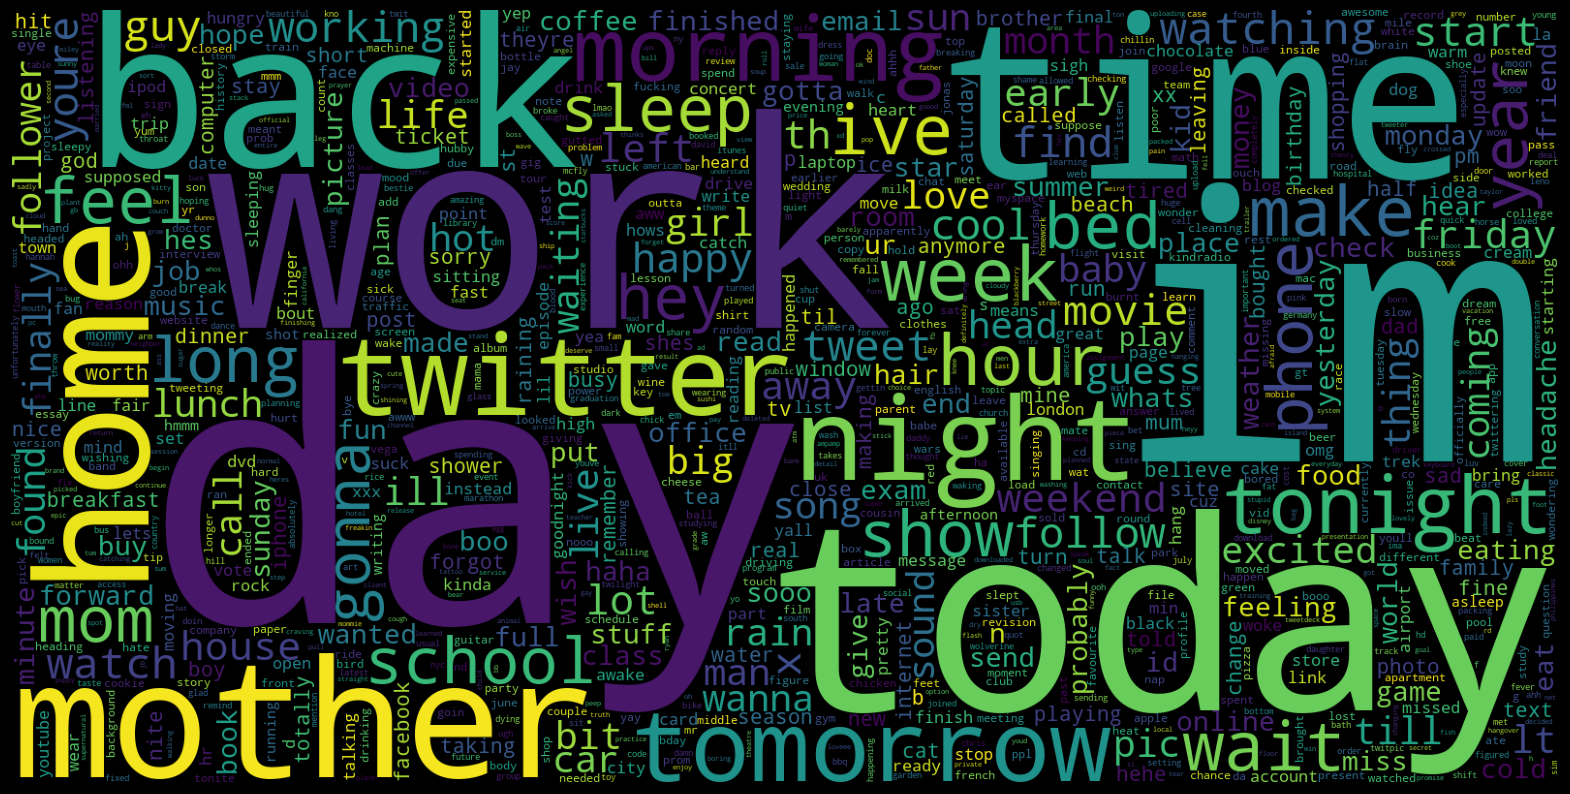

In [295]:
# view topmost occuring neutral words
data = df3[df3["overall_sentiment"]=="neutral"]["Cleaned_English_contents"] 
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [296]:
# getting data ready for modelling
x = df3["Cleaned_English_contents"] 
y = df3["overall_sentiment"]
print(len(x), len(y))

28282 28282


In [297]:
# split our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42) 
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

21211 21211
7071 7071


In [298]:
# convert text to numeric data
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() 
vect.fit(x_train)

CountVectorizer()

In [299]:
# get transformed data
x_train_dtm = vect.transform(x_train) 
x_test_dtm = vect.transform(x_test)

In [300]:
# tune the data
vect_tunned = CountVectorizer(stop_words="english", ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [301]:
# compute word counts
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)
x_train_tfidf

<21211x42473 sparse matrix of type '<class 'numpy.float64'>'
	with 143719 stored elements in Compressed Sparse Row format>

In [302]:
# get you target variable
texts = df3["Cleaned_English_contents"] 
target = df3["overall_sentiment"]

In [303]:
#pip install Keras

In [304]:
# import Tokenizer
from keras.preprocessing.text import Tokenizer

In [305]:
#pip install tensorflow

In [306]:
# break to individual words
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)
vocab_length = len(word_tokenizer.word_index) + 1 
vocab_length

53175

In [307]:
# import libraries for padding
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from nltk.tokenize import word_tokenize

In [308]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)
longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence))) 
length_long_sentence = len(word_tokenize(longest_train))
train_padded_sentences = pad_sequences( 
    embed(texts), 
    length_long_sentence, 
    padding="post"
)
train_padded_sentences

array([[11994,  2673,  4531, ...,     0,     0,     0],
       [11995,   419,    56, ...,     0,     0,     0],
       [11996,   547,  1190, ...,     0,     0,     0],
       ...,
       [53169,     7,     2, ...,     0,     0,     0],
       [53170,  2444,   156, ...,     0,     0,     0],
       [ 4530, 11953,   638, ...,     0,     0,     0]])

In [309]:
import numpy as np

In [310]:
embeddings_dictionary = dict() 
embedding_dim = 100
# Load GloVe 100D embeddings
with open("glove.6B.100d.txt", encoding="utf8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32') 
        embeddings_dictionary [word] = vector_dimensions

In [311]:
from sklearn.naive_bayes import MultinomialNB 
nb = MultinomialNB()
# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [312]:
# getting predictors
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [313]:
#import metrics
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7512374487342667


In [314]:
# create a pipeline for automation
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.pipeline import Pipeline
pipe = Pipeline([("bow", CountVectorizer()), 
                 ("tfid", TfidfTransformer()),  
                 ("model", MultinomialNB())])

In [315]:
# fit pipeline
pipe.fit(x_train, y_train)
y_pred_class = pipe.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.7204072974119644


In [316]:
from sklearn.preprocessing import LabelEncoder

In [317]:
# convert y variable to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [318]:
# split data
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [319]:
#pip install xgboost

In [339]:
import xgboost as xgb
pipe = Pipeline([
    ("bow", CountVectorizer()), 
    ("tfid", TfidfTransformer()),  
    ("model", xgb.XGBClassifier( 
        learning_rate=0.5,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False, 
        eval_metric="auc",
    ))
])

In [340]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=80,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [341]:
# get predictions
y_pred = pipe.predict(X_test)

In [342]:
# view accuracy score
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", acc)

Test accuracy: 0.8191621000530317


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> End of Sentiment Analysis on mother's Day (NLP) 😁😏😣😌😪😐🥱

</p>
</div>